<a href="https://colab.research.google.com/github/Monty-2003/DS_project1/blob/main/SCRIPTS/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from google.colab import drive
drive.mount('/content/drive')

def loadBookData():
  # The column names are adopted from the dataset page on Kaggle
  books = pd.read_csv('/content/drive/MyDrive/DS Project Course/Project1/books_cleaned.csv')
  return books

def loadReviewsData():
  # The column names are adopted from the dataset page on Kaggle
  reviews = pd.read_csv('/content/drive/MyDrive/DS Project Course/Project1/reviews_cleaned.csv')
  return reviews

Mounted at /content/drive


In [2]:
reviews = loadReviewsData()
books = loadBookData()

# merge datasets using 'book_title' from reviews and 'title' from books
merged_data = pd.merge(reviews, books, left_on='book_title', right_on='title', how='inner')


In [3]:
# Summary stats for VADER sentiment scores
sentiment_summary = merged_data['vader_sentiment'].describe()
print(sentiment_summary)


count    227632.000000
mean          0.595835
std           0.565394
min          -1.000000
25%           0.510600
50%           0.868500
75%           0.958600
max           1.000000
Name: vader_sentiment, dtype: float64


sentiment_category
Positive    171609
Neutral      33721
Negative     22302
Name: count, dtype: int64


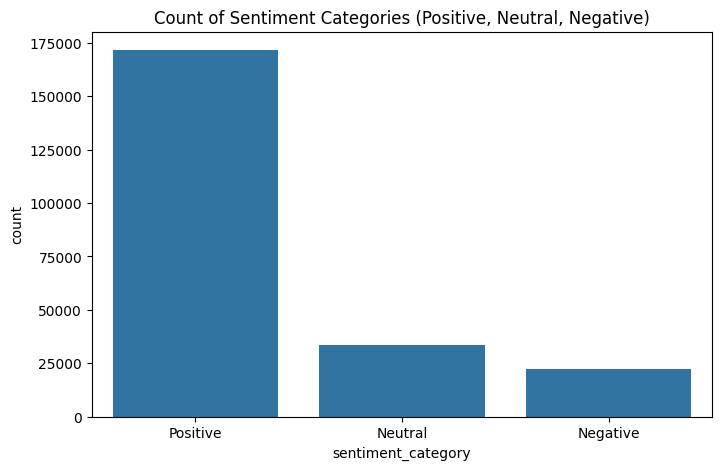

In [4]:
# Categorize reviews into positive, neutral, or negative based on VADER sentiment
def categorize_sentiment(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['sentiment_category'] = merged_data['vader_sentiment'].apply(categorize_sentiment)

# Display the count of each sentiment category
sentiment_counts = merged_data['sentiment_category'].value_counts()
print(sentiment_counts)


plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=merged_data)
plt.title('Count of Sentiment Categories (Positive, Neutral, Negative)')
plt.show()



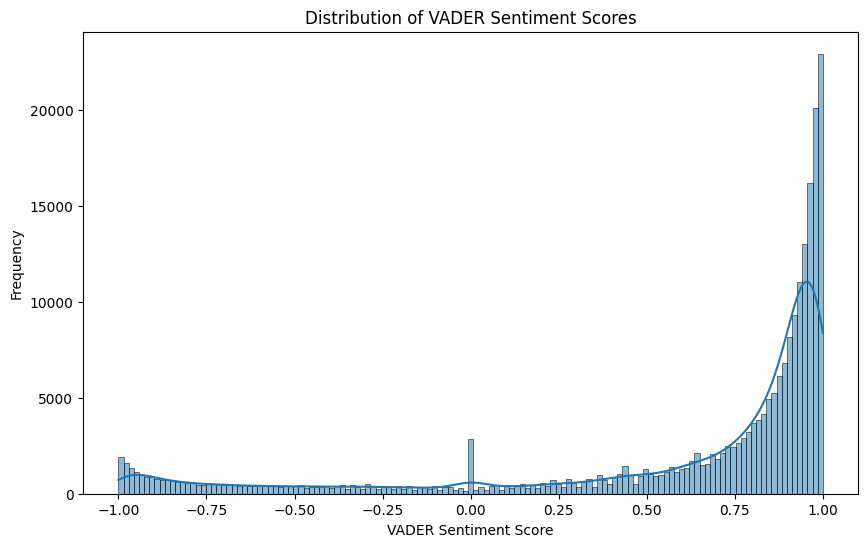

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['vader_sentiment'], kde=True)
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.show()


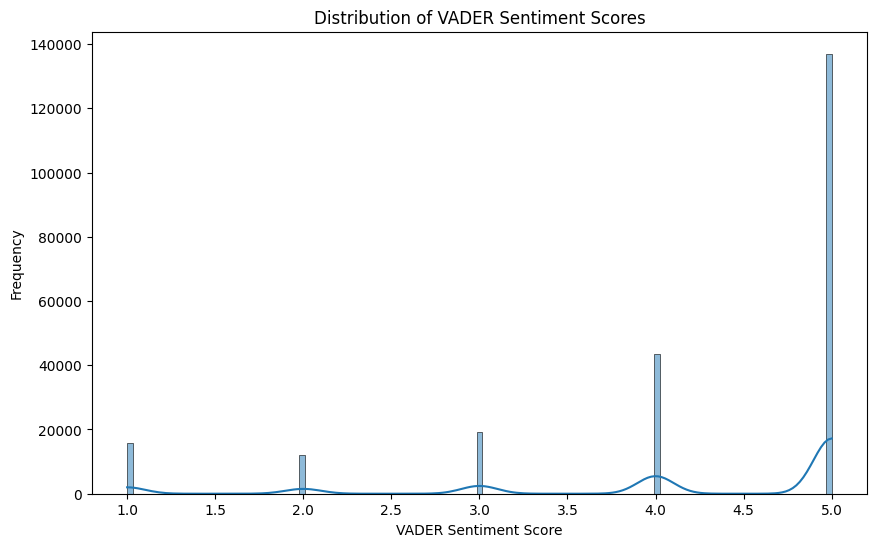

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['score'], kde=True)
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Filter for negative reviews based on sentiment category
negative_reviews = merged_data[merged_data['sentiment_category'] == 'Negative']

# Display basic info about the negative reviews
print(f"Number of negative reviews: {len(negative_reviews)}")
print(negative_reviews[['book_title', 'vader_sentiment', 'score', 'sentiment_category']].head())


Number of negative reviews: 22302
                                            book_title  vader_sentiment  \
4                              The Battleship Bismarck          -0.9600   
9     Beginner's Yoruba (Hippocrene Beginner's Series)          -0.6004   
94                                     The Rabbi's Cat          -0.8052   
106  Lost Cities of Africa and Arabia (The Lost Cit...          -0.8762   
128                     Heartwood: Trickster's Game #1          -0.9481   

     score sentiment_category  
4      3.0           Negative  
9      2.0           Negative  
94     1.0           Negative  
106    1.0           Negative  
128    5.0           Negative  


book_title
Hannibal                                                                                               727
Wuthering Heights                                                                                      300
Eldest (Inheritance, Book 2)                                                                           238
The Killer Angels (Turtleback School & Library Binding Edition)                                        236
Maniac Magee (Turtleback School & Library Binding Edition)                                             199
23 Minutes In Hell: One Man's Story About What He Saw, Heard, and Felt in that Place of Torment        185
The Red Badge of Courage (Lake Illustrated Classics, Collection 1)                                     184
America Alone: The End of the World as We Know It                                                      158
A Lesson Before Dying (Library Edition Audio CDs) (Audio Theatre Collection)                           140
Liberal Fascism: The Secre

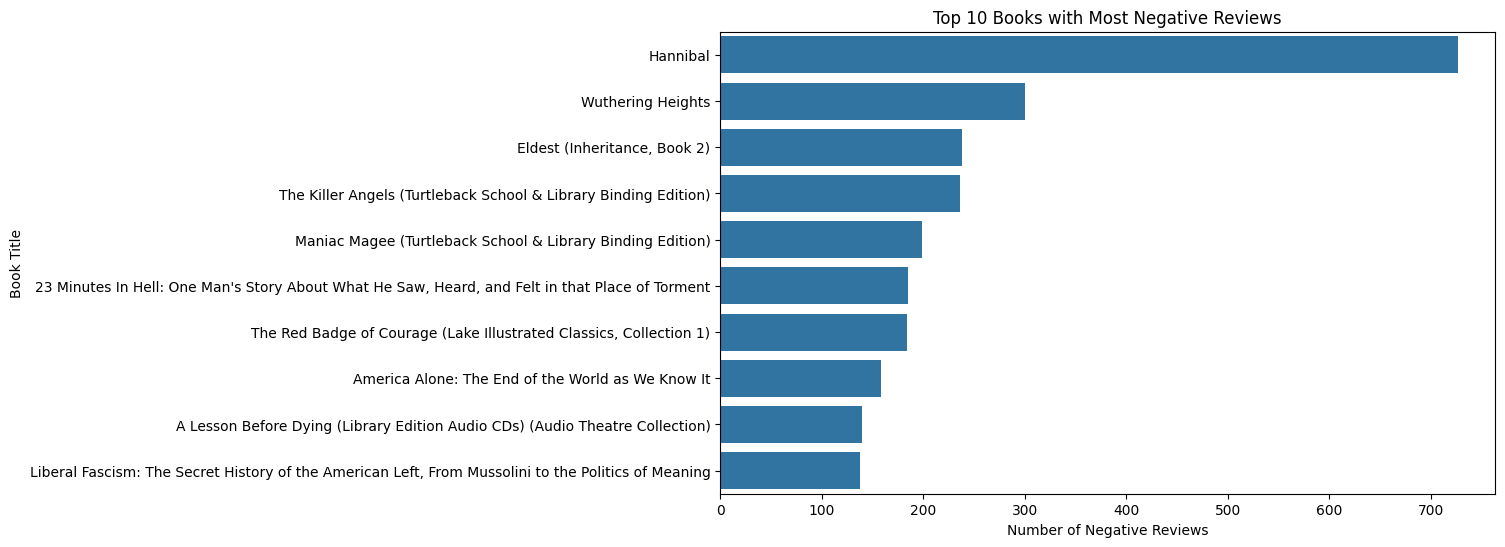

In [8]:
# Count of negative reviews per book title
negative_reviews_per_book = negative_reviews['book_title'].value_counts().head(10)
print(negative_reviews_per_book)

# Bar plot of books with the most negative reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reviews_per_book.values, y=negative_reviews_per_book.index)
plt.title('Top 10 Books with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Book Title')
plt.show()


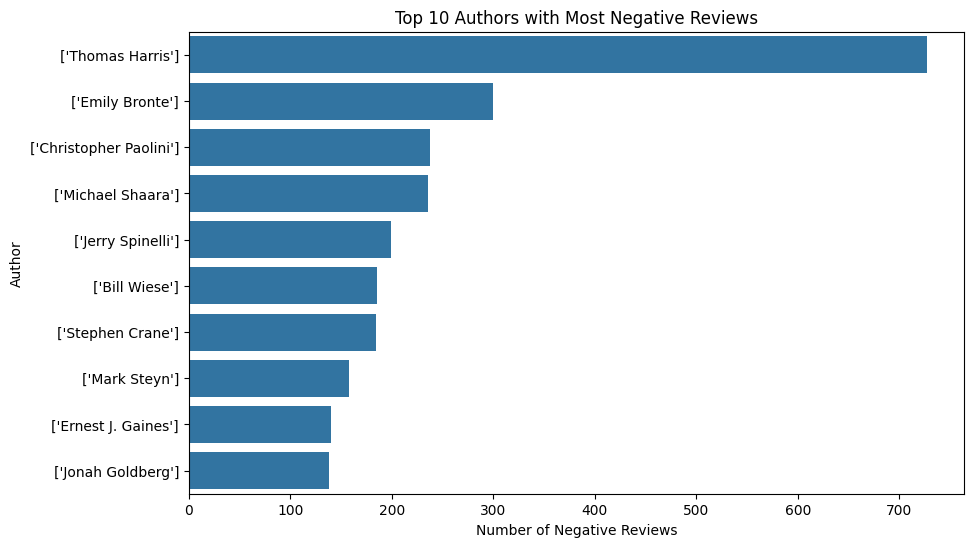

In [9]:
# Top authors with the most negative reviews
negative_reviews_per_author = negative_reviews['authors'].value_counts().head(10)

# Bar plot for authors with the most negative reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reviews_per_author.values, y=negative_reviews_per_author.index)
plt.title('Top 10 Authors with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Author')
plt.show()


In [10]:
# Filter reviews with extreme negative sentiment
extremely_negative_reviews = negative_reviews[negative_reviews['vader_sentiment'] <= -0.8]

print(extremely_negative_reviews[['book_title', 'vader_sentiment', 'score']].head())


                                            book_title  vader_sentiment  score
4                              The Battleship Bismarck          -0.9600    3.0
94                                     The Rabbi's Cat          -0.8052    1.0
106  Lost Cities of Africa and Arabia (The Lost Cit...          -0.8762    1.0
128                     Heartwood: Trickster's Game #1          -0.9481    5.0
132  Thomas Paine : Collected Writings : Common Sen...          -0.9390    5.0


In [11]:
# Create a cross table of review scores and VADER categories
crosstab = pd.crosstab(merged_data['score'], merged_data['sentiment_category'], margins=True, margins_name="Total")

# Display the cross table
print(crosstab)


sentiment_category  Negative  Neutral  Positive   Total
score                                                  
1.0                     5297     4579      6008   15884
2.0                     2755     3068      6119   11942
3.0                     2523     4084     12663   19270
4.0                     3756     5929     33851   43536
5.0                     7971    16061    112968  137000
Total                  22302    33721    171609  227632


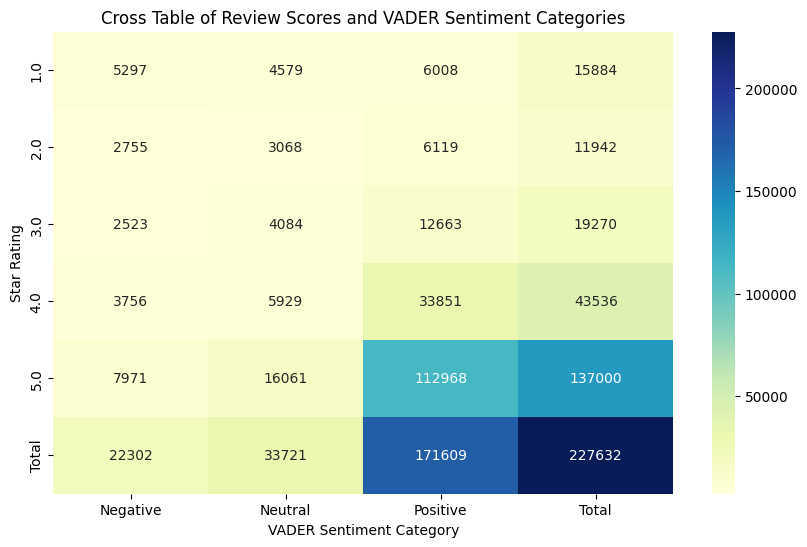

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross Table of Review Scores and VADER Sentiment Categories')
plt.xlabel('VADER Sentiment Category')
plt.ylabel('Star Rating')
plt.show()


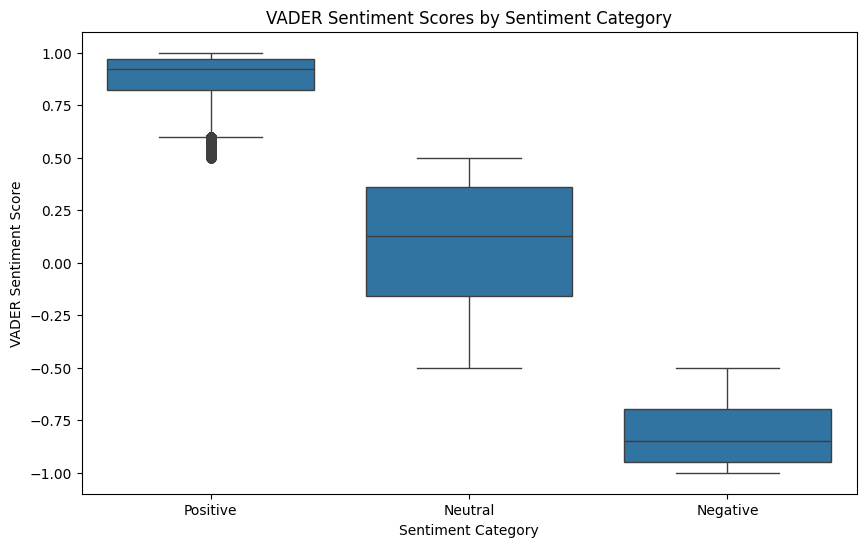

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='vader_sentiment', data=merged_data)
plt.title('VADER Sentiment Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('VADER Sentiment Score')
plt.show()

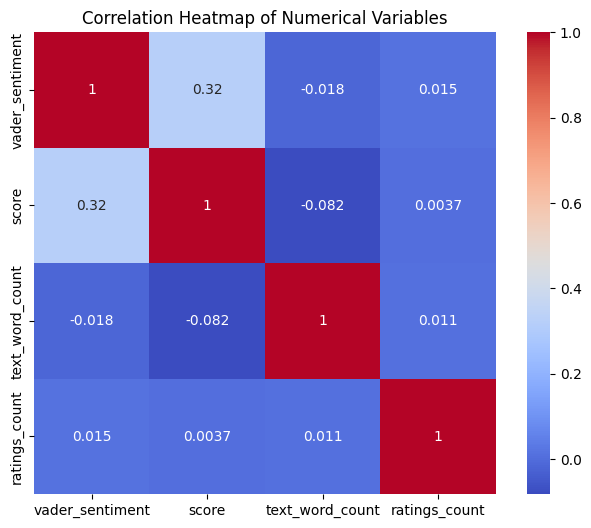

In [16]:
correlation_matrix = merged_data[['vader_sentiment', 'score', 'text_word_count', 'ratings_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


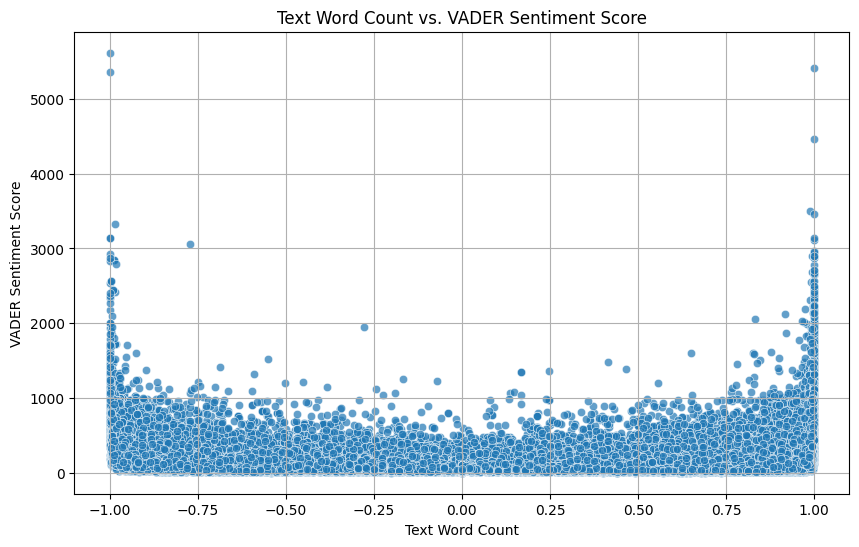

In [17]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='vader_sentiment', y='text_word_count', alpha=0.7)
plt.title('Text Word Count vs. VADER Sentiment Score')
plt.xlabel('Text Word Count')
plt.ylabel('VADER Sentiment Score')
plt.grid()
plt.show()


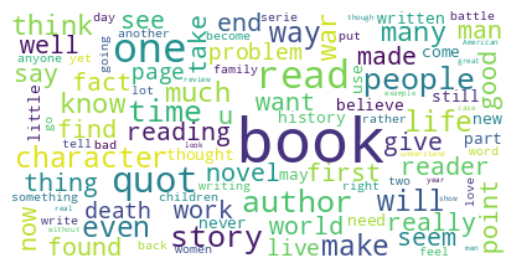

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

negative_review_text = ' '.join(negative_reviews['text'].dropna())

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_review_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

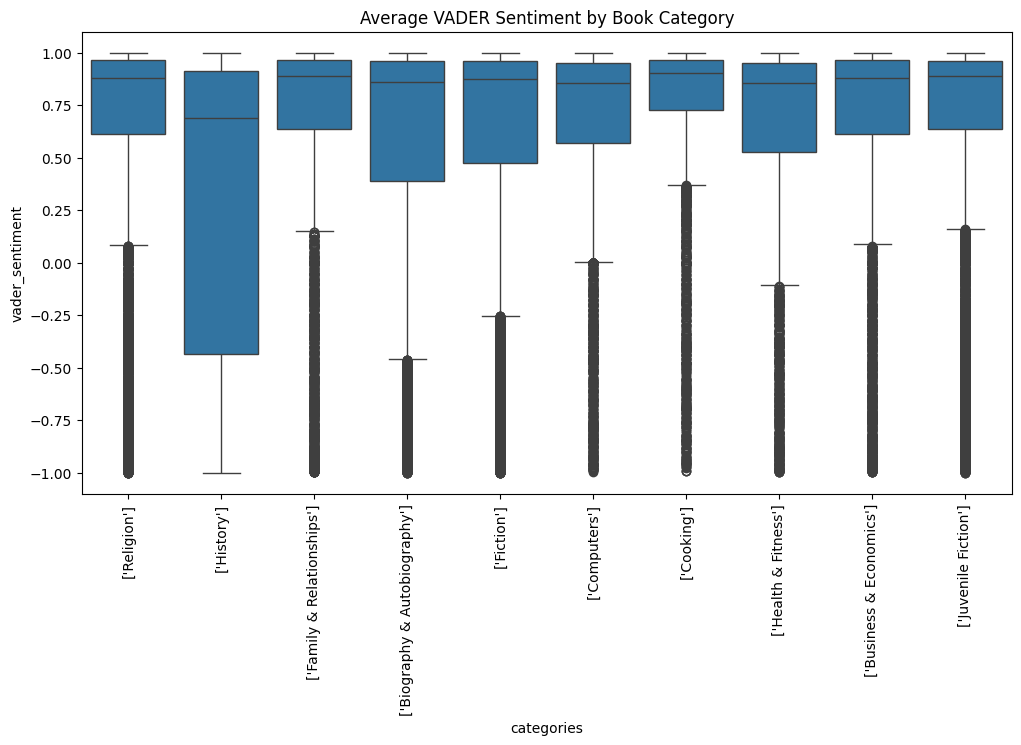

In [27]:
top_10_categories = merged_data['categories'].value_counts().head(10).reset_index()
top_10_categories.columns = ['categories', 'count']


filtered_data = pd.merge(merged_data, top_10_categories[['categories']], on='categories')

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='vader_sentiment', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Average VADER Sentiment by Book Category')
plt.show()


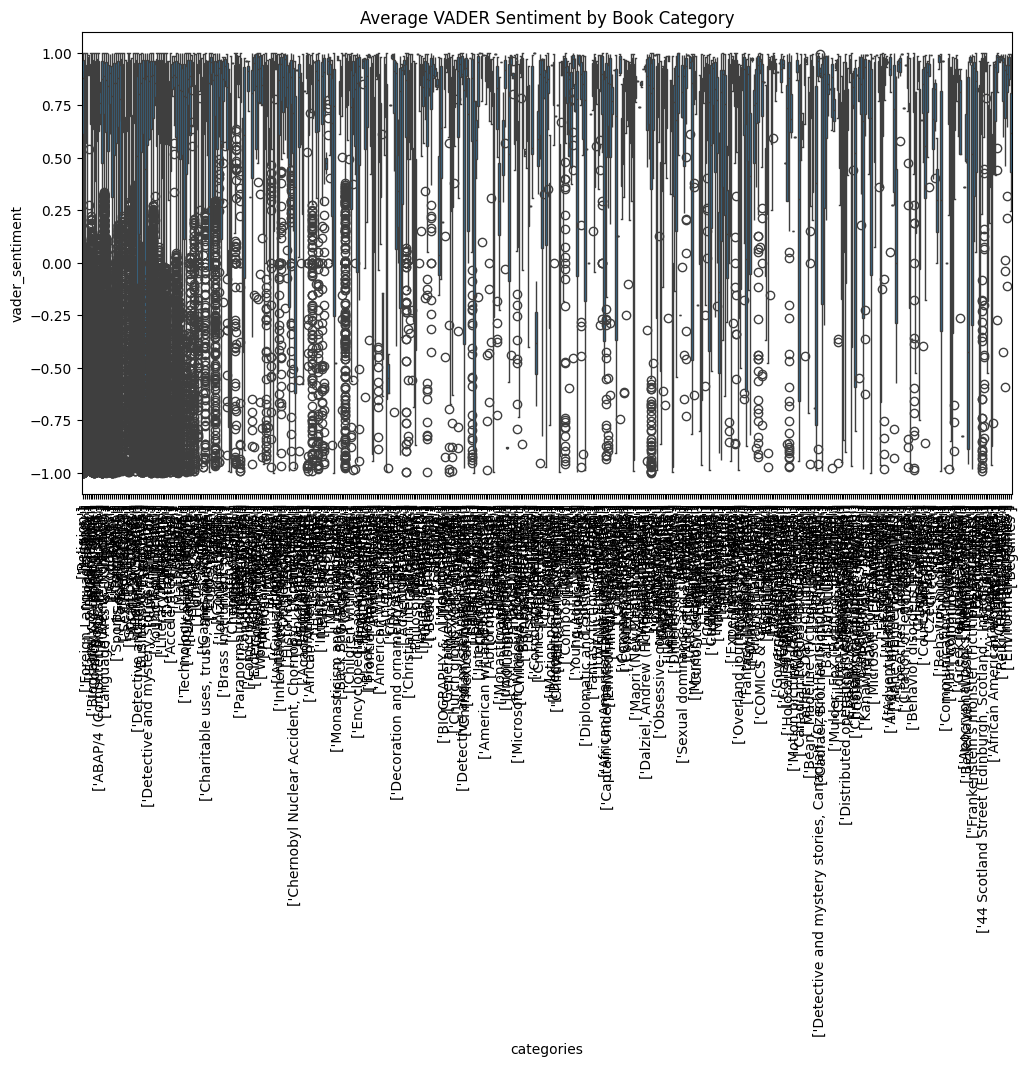

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='vader_sentiment', data=merged_data)
plt.xticks(rotation=90)
plt.title('Average VADER Sentiment by Book Category')
plt.show()


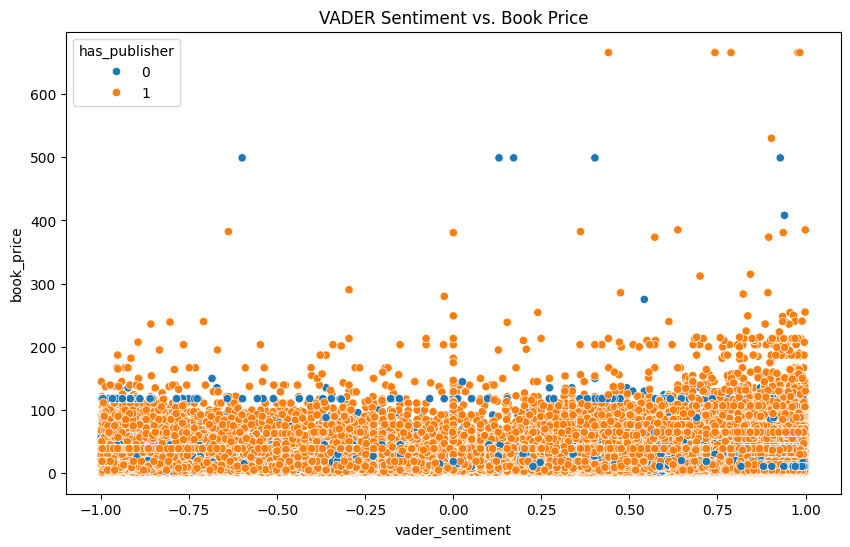

In [20]:
merged_data['has_publisher'] = np.where(merged_data['publisher'].isnull(), 0, 1)
#merged_data = merged_data[merged_data['book_price'] < 300]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='vader_sentiment', y='book_price', hue='has_publisher', data=merged_data)
plt.title('VADER Sentiment vs. Book Price')
plt.show()


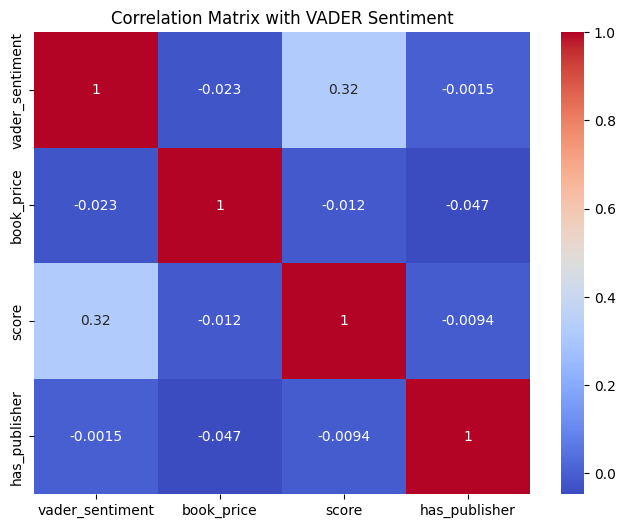

In [21]:
plt.figure(figsize=(8, 6))
correlation_matrix = merged_data[['vader_sentiment', 'book_price', 'score', 'has_publisher']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with VADER Sentiment')
plt.show()


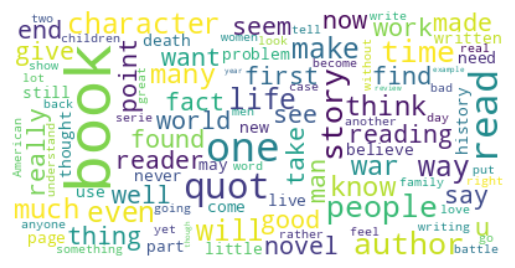

In [22]:
positive_reviews = reviews[reviews['vader_sentiment'] >= 0.8]['text']
positive_review_text = ' '.join(positive_reviews)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_review_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()